In [2]:
import csv
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

### Conjunto de datos 1: groceries.csv

Este conjunto de datos esta estructurado de la siguiente manera:

Cada fila de este conjunto de datos representa una transaccion y cada columna contiene el nombre de un objeto o item.
Este archivo no contiene caveceras.


### Lectura del conjunto de datos

En este paso, nos encargamos de leer el archivo linea por linea, dentro del ciclo, realizamos dos cosas importantes:

* Obtener las transacciones
* Obtener la lista de objetos

Esto se realiza obteniendo todos los items incluidos de cada fila y al final convertirlos en un set para dejar unicamente los valores unicos

In [76]:
transactions = []
items = []
with open('groceries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        transactions.append(row)
        for i in row:
            items.append(i)
        line_count += 1
items = set(items)

### Impresion de los valores obtenidos: Items

In [77]:
pd.DataFrame(items, columns=['Item Name'])

,Item Name
0,mayonnaise
1,domestic eggs
2,zwieback
3,artif. sweetener
4,semi-finished bread
...,...
164,potted plants
165,pastry
166,dishes
167,brown bread


### Impresion de los valores obtenidos: Transacciones
Se imprimen los primeros 10 elementos de la lista para visualizacion

In [78]:
transactions[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals']]

#### Obteniendo datos para la funcion apriori
Finalmente, utilizamos los valores obtenidos en un dataframe de la siguiente manera:
* Los items se convierten en nombres de columnas
* Las transacciones se almacenan linea a linea utilizando un diccionario para agregarlos de forma sencilla
* Los valores perdidos o "Nulos" son enviados a un valor 0

In [80]:
groc = pd.DataFrame(columns = items)
for tran in transactions:
    row = {}
    for item in tran:
        row[item] = 1
    groc = groc.append(row, ignore_index=True)
groc = groc.fillna(0)
groc

,mayonnaise,domestic eggs,zwieback,artif. sweetener,semi-finished bread,sound storage medium,sliced cheese,kitchen towels,chewing gum,candles,...,cocoa drinks,baby food,condensed milk,seasonal products,kitchen utensil,potted plants,pastry,dishes,brown bread,softener
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Obtenemos un los objetos frecuentes utilizando el algoritmo Apriori
Utilizando un soporte de 0.05

In [81]:
support = 0.05
frq_items = apriori(groc, min_support = support, use_colnames = True) 
frq_itemsplt = frq_items.sort_values(by=['support'],ascending=False)
frq_itemsplt.head()

,support,itemsets
22,0.255516,(whole milk)
13,0.193493,(other vegetables)
16,0.183935,(rolls/buns)
17,0.174377,(soda)
18,0.139502,(yogurt)


<AxesSubplot:xlabel='itemsets'>

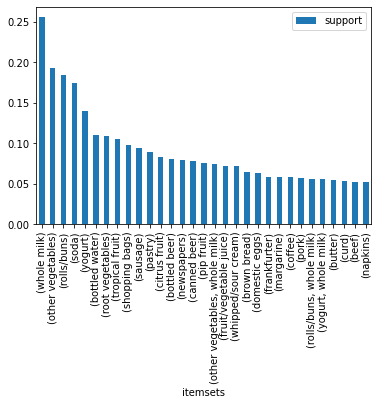

In [82]:
frq_itemsplt.plot.bar(x='itemsets',y='support')

#### Observaciones
Como podemos ver, los items mas frecuentes son:
* whole milk
* other vegetables
* rolls/buns
* soda
* yogurt

Por lo que podemos esperar que alguna regla de asociacion sea utilizado con estos valores

#### Obtenemos las reglas de asociacion con los items mas frecuentes

In [83]:
rules = association_rules(frq_items, min_threshold=support)
rules.sort_values(by='support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


<AxesSubplot:xlabel='antecedents'>

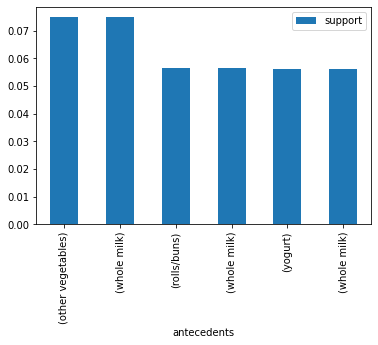

In [114]:
rules.plot.bar(x='antecedents',y='support')

Como pudimos ver, obtenemos un total de 6 reglas de asociacion y con la hipotesis anterior podemos ver que el unico item no encontrado en las reglas de asociacion fue 'soda'.

#### Prueba con soporte = 0.07

<AxesSubplot:xlabel='itemsets'>

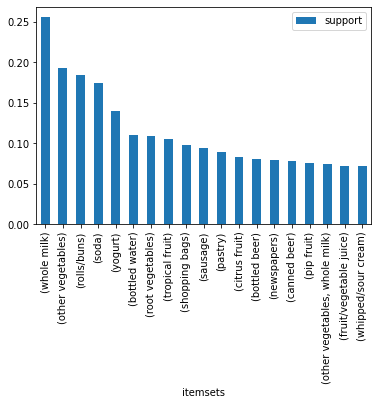

In [69]:
support = 0.07
frq_items = apriori(groc, min_support = support, use_colnames = True) 
frq_itemsplt = frq_items.sort_values(by=['support'],ascending=False)
frq_itemsplt.plot.bar(x='itemsets',y='support')


In [70]:
rules = association_rules(frq_items, min_threshold=support)
rules.sort_values(by='support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548


<AxesSubplot:xlabel='antecedents'>

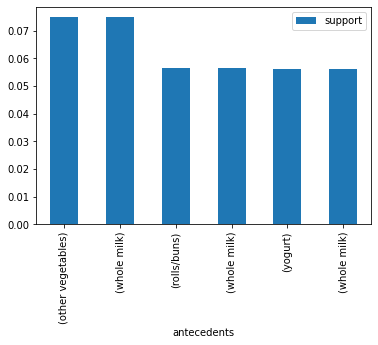

In [113]:
rules.plot.bar(x='antecedents',y='support')

Como pudimos observar, solamente 2 reglas de asociacion cumplieron el requisito minimo.

### Conjunto de datos 2: "groceries - groceries.csv"
Este conjunto puede ser leido mas facilmente utilizando pandas debido a que contienen nombres de columnas.


In [98]:
groc_2 = pd.read_csv('groceries - groceries.csv')
groc_2.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Problemas encontrados.
Como podemos ver, las ventajas que nos daba nos causan problemas debido a que las columnas son: 
* Canitdad de items incluidos en la transaccion
* Columnas donde se hace referencia a un item hasta un maximo de 32 columnas.

Debido a esto debemos hacer una limpieza.

#### Limpiando los datos.
Lo primero que realizaremos sera eliminar la columna que contiene la cantidad de items y posteriormente sustituir todos los valores 'Null' por un 0

Posteriormente obtenemos la lista de items unicos eliminando los 0 y guardamos los valores unicos como columnas de un dataframe

In [99]:
groc_2 = groc_2.drop(columns=['Item(s)'])
ls = groc_2.fillna('0')

lista = []
for i in ls.values.tolist():
    lista += i
lista = set(lista)
lista.remove('0')

groc_2 = pd.DataFrame(columns=lista)

#### Posteriormente, realizamos lo mismo que el conjunto de datos anterior:
* Los items se convierten en nombres de columnas
* Las transacciones se almacenan linea a linea utilizando un diccionario para agregarlos de forma sencilla
* Los valores perdidos o "Nulos" son enviados a un valor 0

In [100]:
for i in ls.values.tolist():
    row = {}
    for item in i:
        if item != '0':
            row[item] = 1
    groc_2 = groc_2.append(row, ignore_index=True)
groc_2 = groc_2.fillna(0)

In [105]:
groc_2.head()

,mayonnaise,domestic eggs,zwieback,artif. sweetener,semi-finished bread,sound storage medium,sliced cheese,kitchen towels,chewing gum,candles,...,cocoa drinks,baby food,condensed milk,seasonal products,kitchen utensil,potted plants,pastry,dishes,brown bread,softener
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Utilizando el algoritmo apriori con un soporte minimo del 0.05 

In [106]:
support = 0.05
frq_items = apriori(groc_2, min_support = support, use_colnames = True) 
frq_itemsplt = frq_items.sort_values(by=['support'],ascending=False)
frq_itemsplt.head()

,support,itemsets
22,0.255516,(whole milk)
13,0.193493,(other vegetables)
16,0.183935,(rolls/buns)
17,0.174377,(soda)
18,0.139502,(yogurt)


<AxesSubplot:xlabel='itemsets'>

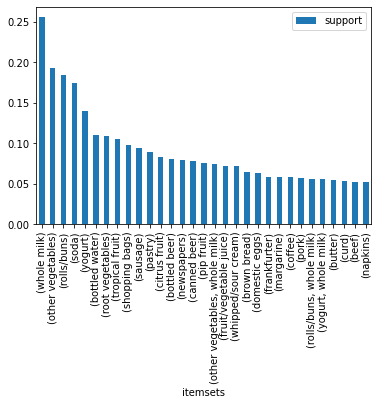

In [108]:
frq_itemsplt.plot.bar(x='itemsets',y='support')

Como pudimos ver en lo anterior, tenemos unos resultados muy similares que en el dataset anterior, teniendo los mismos 5 items con la mayor cantidad de soporte por lo que podemos pensar que las reglas de asociacion serian similares

In [109]:
rules = association_rules(frq_items, min_threshold=support)
rules.sort_values(by='support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


<AxesSubplot:xlabel='antecedents'>

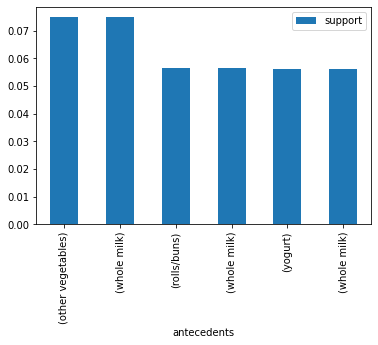

In [112]:
rules.plot.bar(x='antecedents',y='support')

Y como podemos ver, tenemos los mismos resultados por lo que podemos pensar que es la misma base de datos pero almacenada de manera diferente.

#### Conjunto de datos 3: 'bread basket.csv'


In [110]:
data_or = pd.read_csv('bread basket.csv') 
data_or.head() 

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


Como podemos ver, este conjunto de datos esta estructurado de la siguiente manera:
* Numero de transaccion
* Item de esta transaccion
* Objeto Datetime 
* Periodo del dia donde se realizo
* Semana o Fin de semana

Teniendo estos datos, podemos realizar diferentes analisis, para comenzar vamos a realizar el analisis por periodo del dia, para ello eliminaremos las siguientes columnas:
* weekdat_weekend
* datetime

Debido a que estos no tendran relevancia alguna en este enfoque, posteriormente guardaremos los datos filtrados por los diferentes tipos de periodos

In [191]:
data = data_or.drop(columns=['date_time', 'weekday_weekend'])

Posteriormente, vamos a realizar lo siguiente con los datos de la mañana para ejemplificar:
* Agrupar los datos por transaccion e items
* Contar los valores similares, esto causara que tengamos los valores de cada una de los items encontrados para cada transaccion de forma unica
* Separar los valores, esto causara que los items se conviertan en las columnas manteniendo los valores obtenidos
* Reiniciar los indices, para ahorrar una columna y facilitar la visualizacion
* Llenar todos los valores Null con 0
* Cambiar los indices a el numero de transaccion

In [175]:
morning = (data[data['period_day'] =="morning"])
morning = morning.groupby(['Transaction','Item'])\
       .count().unstack().reset_index().fillna(0)\
       .set_index('Transaction')

morning.head()

period_day                                     \
Item        Afternoon with the baker Alfajores Argentina Night Art Tray   
Transaction                                                               
1                                0.0       0.0             0.0      0.0   
2                                0.0       0.0             0.0      0.0   
3                                0.0       0.0             0.0      0.0   
4                                0.0       0.0             0.0      0.0   
5                                0.0       0.0             0.0      0.0   

                                                                       ...  \
Item        Baguette Bakewell Basket Bread Brioche and salami Brownie  ...   
Transaction                                                            ...   
1                0.0      0.0    0.0   1.0                0.0     0.0  ...   
2                0.0      0.0    0.0   0.0                0.0     0.0  ...   
3                0.0      0.0    0.0   0.0                0.0     0.0  ...   
4                0.0      0.0    0.0   0.0                0.0     0.0  ...   
5                0.0      0.0    0.0   1.0                0.0     0.0  ...   

                                                                            \
Item         Tea The BART The Nomad Tiffin Toast Truffles Valentine's card   
Transaction                                                                  
1            0.0      0.0       0.0    0.0   0.0      0.0              0.0   
2            0.0      0.0       0.0    0.0   0.0      0.0              0.0   
3            0.0      0.0       0.0    0.0   0.0      0.0              0.0   
4            0.0      0.0       0.0    0.0   0.0      0.0              0.0   
5            0.0      0.0       0.0    0.0   0.0      0.0              0.0   

                                                         
Item        Vegan Feast Vegan mincepie Victorian Sponge  
Transaction                                              
1                   0.0            0.0              0.0  
2                   0.0            0.0              0.0  
3                   0.0            0.0              0.0  
4                   0.0            0.0              0.0  
5                   0.0            0.0              0.0  

[5 rows x 76 columns]

In [176]:
morning.columns[:5]

MultiIndex([('period_day', 'Afternoon with the baker'),
            ('period_day',                'Alfajores'),
            ('period_day',          'Argentina Night'),
            ('period_day',                 'Art Tray'),
            ('period_day',                 'Baguette')],
           names=[None, 'Item'])

Viendo los datos anteriores vemos que las columnas son MultiIndex, por lo que vamos a convertirla a la normalidad esto fue debido a que hicimos una agrupacion anteriormente y este fue almacenado como un MultiIndex.

In [177]:
morning.columns = morning.columns.get_level_values(1)
morning

Item,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Baguette,Bakewell,Basket,Bread,Brioche and salami,Brownie,...,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finalmente, tenemos valores diferentes de 1 y 0 por lo que debemos realizar un mapeo de estos valores, para esto utilizaremos la siguiente función y realizaremos el mapeo.

In [178]:
def transformar_uno_cero(x):
    if x <= 0:
        return 0
    else:
        return 1

In [179]:
morning = morning.applymap(transformar_uno_cero)
morning

Item,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Baguette,Bakewell,Basket,Bread,Brioche and salami,Brownie,...,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9659,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9660,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Teniendo los valores finales, podemos realizar la aplicacion del algoritmo apriori, al igual que los datos anteriores utilizaremos un soporte minimo de 0.05

In [180]:
support = 0.05
frq_items = apriori(morning, min_support = support, use_colnames = True) 
frq_items.sort_values(by='support',ascending=False)

,support,itemsets
2,0.514989,(Coffee)
0,0.363149,(Bread)
6,0.139410,(Pastry)
7,0.107482,(Tea)
8,0.094078,"(Bread, Coffee)"
5,0.092615,(Medialuna)
10,0.077261,"(Pastry, Coffee)"
1,0.063125,(Cake)
9,0.054594,"(Medialuna, Coffee)"
4,0.052888,(Hot chocolate)


<AxesSubplot:xlabel='itemsets'>

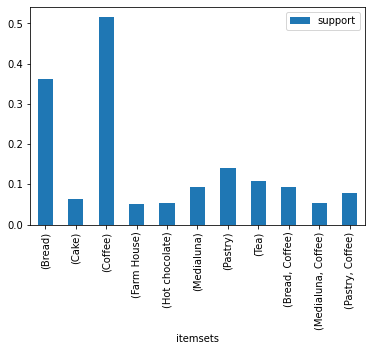

In [181]:
frq_items.plot.bar(x='itemsets',y='support')

Con los valores anteriores podemos ver que los items con mayor soporte son:
* cafe
* pan
* pasteleria
* te

Por lo que podemos esperar que las reglas sean incluidas con estos valores

In [186]:
rules = association_rules(frq_items, metric="lift", min_threshold=support)
rules.sort_values(by='support',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Coffee),0.363149,0.514989,0.094078,0.259060,0.503041,-0.092940,0.654589
1,(Coffee),(Bread),0.514989,0.363149,0.094078,0.182679,0.503041,-0.092940,0.779193
4,(Pastry),(Coffee),0.139410,0.514989,0.077261,0.554196,1.076131,0.005466,1.087946
5,(Coffee),(Pastry),0.514989,0.139410,0.077261,0.150024,1.076131,0.005466,1.012487
2,(Medialuna),(Coffee),0.092615,0.514989,0.054594,0.589474,1.144633,0.006898,1.181437


<AxesSubplot:xlabel='antecedents'>

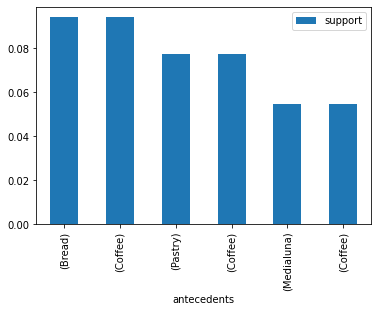

In [188]:
rules.sort_values(by='support',ascending=False).plot.bar(x='antecedents',y='support')

Con los valores anteriores, podemos ver que parte de nuestra hipotesis fue correcta, debido a que las reglas incluyen 3 de nuestros 4 valores.
Sin embargo solo obtuvimos 5 reglas de asociacion.

##### Construccion de funcion
Ahora crearemos una funcion para realizar estos procedimientos para ahorrar espacio.

In [189]:
def bread_basket(df,support):
    df_local = df.copy()
    df_local = df_local.groupby(['Transaction','Item']).count().unstack().reset_index().fillna(0).set_index('Transaction')
    df_local.columns = df_local.columns.get_level_values(1)
    basket_sets = df_local.applymap(transformar_uno_cero)
    frq_items = apriori(basket_sets, min_support = support, use_colnames = True) 
    rules = association_rules(frq_items, min_threshold=support)
    return frq_items,rules

#### Obtencion de datos separados

In [192]:
morning = (data[data['period_day'] =="morning"])
after = (data[data['period_day'] =="afternoon"])
evening = (data[data['period_day'] =="evening"])
ngt = (data[data['period_day'] =="night"])

#### Mañana con un soporte de 0.005

In [201]:
items,reglas = bread_basket(morning,0.005)
items.sort_values(by='support',ascending=False)

,support,itemsets
5,0.514989,(Coffee)
2,0.363149,(Bread)
17,0.139410,(Pastry)
23,0.107482,(Tea)
32,0.094078,"(Bread, Coffee)"
...,...,...
87,0.005362,"(Cake, Tea, Coffee)"
21,0.005118,(Smoothies)
61,0.005118,"(Scandinavian, Coffee)"
86,0.005118,"(Bread, Medialuna, Pastry)"


<AxesSubplot:xlabel='itemsets'>

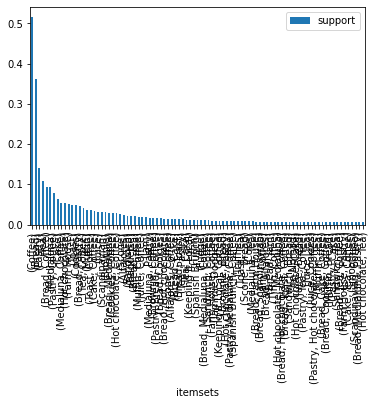

In [196]:
items.sort_values(by='support',ascending=False).plot.bar(x='itemsets',y='support')

In [225]:
rules = association_rules(items, metric="lift", min_threshold=support)
rules.sort_values(by='support',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Juice),(Mineral water),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1,(Mineral water),(Juice),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


<AxesSubplot:xlabel='antecedents'>

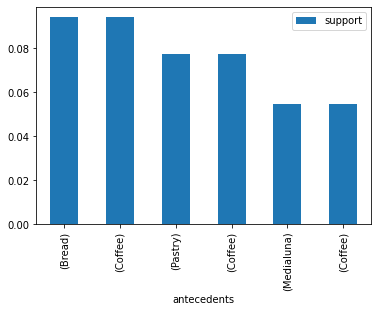

In [205]:
rules.sort_values(by='support',ascending=False).plot.bar(x='antecedents',y='support')

### Tarde con un soporte de 0.05

In [198]:
items,reglas = bread_basket(after,0.05)
items.sort_values(by='support',ascending=False)

,support,itemsets
2,0.459815,(Coffee)
0,0.305758,(Bread)
7,0.169778,(Tea)
1,0.136766,(Cake)
5,0.115936,(Sandwich)
8,0.089998,"(Bread, Coffee)"
9,0.071920,"(Cake, Coffee)"
10,0.062291,"(Sandwich, Coffee)"
4,0.061505,(Hot chocolate)
6,0.060719,(Soup)


<AxesSubplot:xlabel='itemsets'>

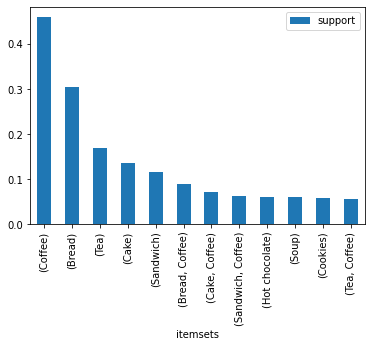

In [199]:
items.sort_values(by='support',ascending=False).plot.bar(x='itemsets',y='support')

In [224]:
rules = association_rules(items, metric="lift", min_threshold=support)
rules.sort_values(by='support',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Juice),(Mineral water),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1,(Mineral water),(Juice),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


<AxesSubplot:xlabel='antecedents'>

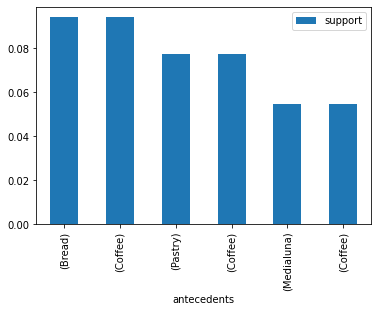

In [207]:
rules.sort_values(by='support',ascending=False).plot.bar(x='antecedents',y='support')

### Tarde con un soporte de 0.005

In [208]:
items,reglas = bread_basket(after,0.005)
items.sort_values(by='support',ascending=False)

,support,itemsets
8,0.459815,(Coffee)
4,0.305758,(Bread)
33,0.169778,(Tea)
6,0.136766,(Cake)
26,0.115936,(Sandwich)
...,...,...
45,0.005109,"(Bread, Chicken Stew)"
32,0.005109,(Tartine)
11,0.005109,(Extra Salami or Feta)
70,0.005109,"(Pastry, Cake)"


<AxesSubplot:xlabel='itemsets'>

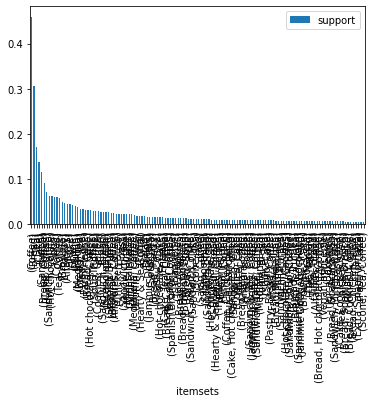

In [209]:
items.sort_values(by='support',ascending=False).plot.bar(x='itemsets',y='support')

In [223]:
rules = association_rules(items, metric="lift", min_threshold=support)
rules.sort_values(by='support',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Juice),(Mineral water),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1,(Mineral water),(Juice),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


<AxesSubplot:xlabel='antecedents'>

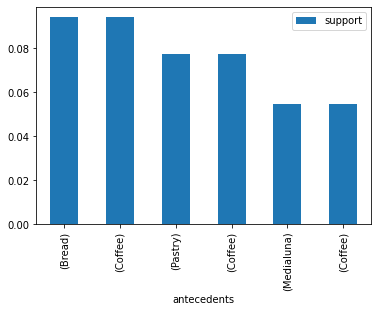

In [211]:
rules.sort_values(by='support',ascending=False).plot.bar(x='antecedents',y='support')

### Noche con un soporte de 0.05

In [219]:
items,reglas = bread_basket(ngt,0.05)
items.sort_values(by='support',ascending=False)

,support,itemsets
5,0.583333,(Vegan Feast)
4,0.166667,(Valentine's card)
0,0.083333,(Hot chocolate)
1,0.083333,(Juice)
2,0.083333,(Mineral water)
3,0.083333,(Scandinavian)
6,0.083333,"(Juice, Mineral water)"


### Este fue uno de los momentos donde los valores cambiaron por completo debido a que ninguno de nuestros items mas frecuentes es igual a los anteriores

<AxesSubplot:xlabel='itemsets'>

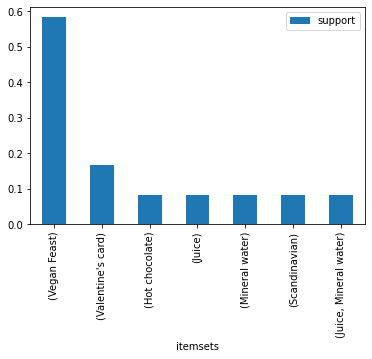

In [220]:
items.sort_values(by='support',ascending=False).plot.bar(x='itemsets',y='support')

In [226]:
rules = association_rules(items, metric="lift", min_threshold=support)
rules.sort_values(by='support',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Juice),(Mineral water),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1,(Mineral water),(Juice),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


<AxesSubplot:xlabel='antecedents'>

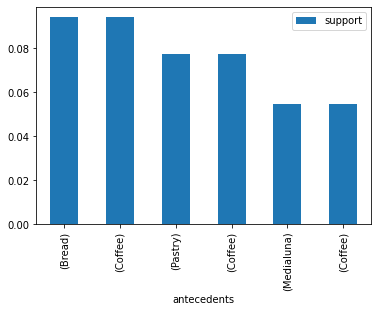

In [217]:
rules.sort_values(by='support',ascending=False).plot.bar(x='antecedents',y='support')

### Noche con un soporte de 0.005

In [231]:
items,reglas = bread_basket(ngt,0.005)
items.sort_values(by='support',ascending=False)

,support,itemsets
5,0.583333,(Vegan Feast)
4,0.166667,(Valentine's card)
0,0.083333,(Hot chocolate)
1,0.083333,(Juice)
2,0.083333,(Mineral water)
3,0.083333,(Scandinavian)
6,0.083333,"(Juice, Mineral water)"


<AxesSubplot:xlabel='itemsets'>

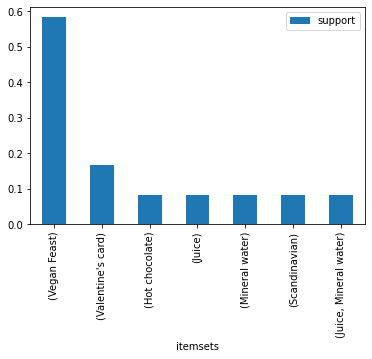

In [232]:
items.sort_values(by='support',ascending=False).plot.bar(x='itemsets',y='support')

In [233]:
rules = association_rules(items, metric="lift", min_threshold=support)
rules.sort_values(by='support',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Juice),(Mineral water),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1,(Mineral water),(Juice),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


<AxesSubplot:xlabel='antecedents'>

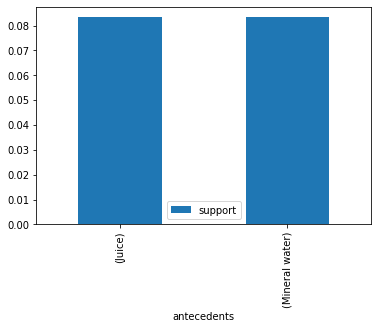

In [234]:
rules.sort_values(by='support',ascending=False).plot.bar(x='antecedents',y='support')

#### Conclusiones:
Este proyecto nos llevo a explorar diferentes formas de trabajar los valores almacenados en diferentes bases de datos, de igual forma podemos ver que hay una relacion en algunos casos en los que podemos ver que los items mas frecuentes estan contemplados en las reglas de asociacion sin embargo hay casos en los que no es asi como pudimos ver en el caso de breadbasket.csv en los items filtrados en la noche en donde solo obtuvimos 2 reglas en las que pocos valores fueron usados

##### Vazquez Pompa Noe - 160300153